<a href="https://colab.research.google.com/github/JefNtungila/DS-Unit-2-Regression-2/blob/master/Jef_Ntungila_DS_Sprint_Challenge_8_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Regression 2 Sprint Challenge: Predict drugstore sales 🏥

For your Sprint Challenge, you'll use real-world sales data from a German drugstore chain, from Jan 2, 2013 — July 31, 2015.

You are given three dataframes:

- `train`: historical sales data for 100 stores
- `test`: historical sales data for 100 different stores
- `store`: supplemental information about the stores


The train and test set do _not_ have different date ranges. But they _do_ have different store ids. Your task is _not_ to forecast future sales from past sales. **Your task is to predict sales at unknown stores, from sales at known stores.**

In [0]:
import pandas as pd
train = pd.read_csv('https://drive.google.com/uc?export=download&id=1E9rgiGf1f_WL2S4-V6gD7ZhB8r8Yb_lE')
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1vkaVptn4TTYC9-YPZvbvmfDNHVR8aUml')
store = pd.read_csv('https://drive.google.com/uc?export=download&id=1rZD-V1mWydeytptQfr-NL7dBqre6lZMo')
assert train.shape == (78400, 7)
assert test.shape == (78400, 7)
assert store.shape == (200, 10)

The dataframes have a variety of columns:

- **Store** - a unique Id for each store
- **DayOfWeek** - integer, 1-6
- **Date** - the date, from Jan 2, 2013 — July 31, 2015.
- **Sales** - the units of inventory sold on a given date (this is the target you are predicting)
- **Customers** - the number of customers on a given date
- **Promo** - indicates whether a store is running a promo on that day
- **SchoolHoliday** - indicates the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

This Sprint Challenge has three parts. To demonstrate mastery on each part, do all the required instructions. To earn a score of "3" for the part, also do the stretch goals.

## 1. Wrangle relational data, Log-transform the target
- Merge the `store` dataframe with the `train` and `test` dataframes. 
- Arrange the X matrix and y vector for the train and test sets.
- Log-transform the target for the train and test set.
- Plot the target's distribution for the train set, before and after the transformation.

#### Stretch goals
- Engineer 3+ more features.

##Exploring Data

In [115]:
store.head() #exploring data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
1,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
2,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
3,11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
4,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [0]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [117]:
#splitting the store data in half 

from sklearn.model_selection import train_test_split
train_store, test_store = train_test_split(store, test_size = 0.5, random_state=42)
train_store.shape, test_store.shape

((100, 10), (100, 10))

##Merging store dataframe with the other dataframes

In [0]:
train = train.merge(train_store, how='left') #merging original train with new data from store
test = test.merge(test_store, how='left') #merging original test data with new data from store

In [119]:
train.shape, test.shape

((78400, 16), (78400, 16))

##Arranging x and y matrix

In [120]:
train.columns.values

array(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype=object)

In [121]:
train.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Promo                                 int64
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [122]:
train.isnull().sum()

Store                            0
DayOfWeek                        0
Date                             0
Sales                            0
Customers                        0
Promo                            0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth    13328
CompetitionOpenSinceYear     13328
Promo2                           0
Promo2SinceWeek              62720
Promo2SinceYear              62720
PromoInterval                62720
dtype: int64

In [0]:
target = 'Store'
feature = ['DayOfWeek', 'Sales', 'Customers', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

In [0]:
X_train = train[feature]
y_train = train[target]
X_val = val[feature]
y_val = val[target]
X_test = test[feature]
y_test = test[target]

In [131]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,32490.000000,32490.000000,39200.000000,7786.000000,7786.000000
mean,541.060765,3.490791,6983.963954,826.318010,0.451403,0.196199,4776.059439,7.120529,2010.968390,0.198622,24.534678,2011.603262
std,326.286441,1.712779,2819.560183,316.115854,0.497639,0.397126,8974.074571,3.232141,2.457159,0.398968,13.576015,0.970170
min,4.000000,1.000000,1712.000000,206.000000,0.000000,0.000000,30.000000,1.000000,2006.000000,0.000000,1.000000,2010.000000
25%,257.000000,2.000000,5015.000000,599.000000,0.000000,0.000000,720.000000,4.000000,2009.000000,0.000000,14.000000,2011.000000
50%,549.000000,3.000000,6379.000000,758.000000,0.000000,0.000000,1950.000000,9.000000,2011.000000,0.000000,22.000000,2012.000000
75%,824.000000,5.000000,8280.000000,993.000000,1.000000,0.000000,4030.000000,9.000000,2013.000000,0.000000,35.000000,2012.000000
max,1113.000000,6.000000,26914.000000,3360.000000,1.000000,1.000000,48330.000000,12.000000,2015.000000,1.000000,48.000000,2013.000000


In [132]:
train.describe(exclude = 'number')

,Date,StoreType,Assortment,PromoInterval
count,39200,39200,39200,7786
unique,784,3,2,3
top,2015-03-18 00:00:00,a,c,"Jan,Apr,Jul,Oct"
freq,65,26728,22346,3525
first,2013-01-02 00:00:00,NaN,NaN,NaN
last,2015-07-31 00:00:00,NaN,NaN,NaN


##Log-transform the target for the train and test set.

In [0]:
import numpy as np
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
y_val_log = np.log1p(y_val)

##Plot the target's distribution for the train set, before and after the transformation.

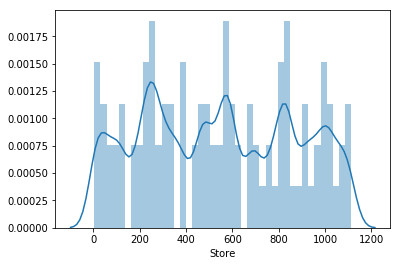

In [126]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

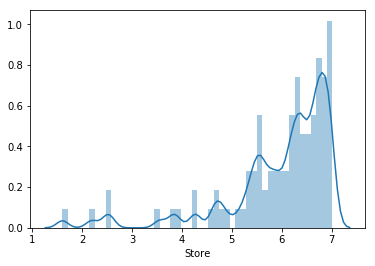

In [127]:
sns.distplot(y_train_log);

## 2. Fit and validate your model
- **Use Gradient Boosting** or any type of regression model.
- **Beat the baseline:** The estimated baseline Root Mean Squared Logarithmic Error is 0.90, if we guessed the mean sales for every prediction. Remember that RMSE with the log-transformed target is equivalent to RMSLE with the original target. Try to get your error below 0.20.
- **To validate your model, choose any one of these options:**
  - Split the train dataframe into train and validation sets. Put all dates for a given store into the same set. Use xgboost `early_stopping_rounds` with the validation set. 
  - Or, use scikit-learn `cross_val_score`. Put all dates for a given store into the same fold.
  - Or, use scikit-learn `RandomizedSearchCV` for hyperparameter optimization. Put all dates for a given store into the same fold.
- **Get the Validation Error** (multiple times if you try multiple iterations) **and Test Error** (one time, at the end).
  
#### Stretch goal
- Optimize 3+ hyperparameters by searching 10+ "candidates" (possible combinations of hyperparameters). 

##To validate your model, choose any one of these options: Split the train dataframe into train and validation sets.

In [128]:
#splitting train to get validation set
train, val = train_test_split(train, test_size=0.5, random_state=42) #not ideal, but the test size is so big already
train.shape, val.shape, test.shape

((39200, 16), (39200, 16), (78400, 16))

##Regression model

In [56]:
!pip install category_encoders

In [0]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [0]:

from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

##Get validation error

In [137]:
from xgboost import XGBRegressor
pipeline = make_pipeline(ce.OrdinalEncoder(), XGBRegressor(n_estimators=1000, n_jobs=-1))
pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:09:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation Error 0.02576854605442502


## 3. Plot model interpretation visualizations
- Choose any one of these options:
  - Permutation Importances plot
  - Partial Dependency Plot, 1 feature isolation
  - Partial Dependency Plot, 2 feature interaction
  
#### Stretch goals
- Plot 2+ visualizations.
- Use permutation importances for feature selection. 

In [151]:
forest = pipeline.named_steps['XGBRegressor']
importances = pd.Series(forest.feature_importances_, feature)

importances.sort_values().plot.barh()

KeyError: ignored

In [142]:
!pip install eli5 pdpbox category_encoders

     |████████████████████████████████| 102kB 4.4MB/s 
     |████████████████████████████████| 57.7MB 27.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

In [149]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(pipeline, scoring='neg_mean_squared_error', 
                                 cv='prefit', n_iter=2, random_state=42)

permuter.fit(X_train_encoded, y_val_log)
feature_names = X_train_encoded.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

ValueError: ignored